## Read in Skynet Data and Plot it

In [45]:
import lightkurve as lk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib widget

In [46]:
datafile = "data/ngc3201RRL_photometry.csv"

In [47]:
data = pd.read_csv(datafile)
data

,file_id,id,time,jd,mjd,ra_hours,dec_degs,x,y,telescope,...,zero_point,flux,flux_error,pm_sky,pm_epoch,pm_pos_angle_sky,zero_point_correction,zero_point_error,calibrated_zero_point,calibrated_mag
0,384,SRC0,50:21.0,2460012.118,60011.61830,10.298786,-46.357207,801.919207,121.693419,PROMPT-MO-1,...,20,34239.27193,249.914205,NaN,12:35.0,NaN,NaN,NaN,NaN,NaN
1,384,SRC1,50:21.0,2460012.118,60011.61830,10.298294,-46.345756,772.759705,52.281110,PROMPT-MO-1,...,20,27493.55691,236.353155,NaN,12:35.0,NaN,NaN,NaN,NaN,NaN
2,385,SRC0,27:34.0,2460012.186,60011.68581,10.298786,-46.357186,801.963663,121.563837,PROMPT-MO-1,...,20,23495.04867,230.783708,NaN,12:35.0,NaN,NaN,NaN,NaN,NaN
3,385,SRC1,27:34.0,2460012.186,60011.68581,10.298291,-46.345710,772.559613,52.002164,PROMPT-MO-1,...,20,26890.48795,237.779329,NaN,12:35.0,NaN,NaN,NaN,NaN,NaN
4,386,SRC0,36:53.0,2460012.234,60011.73395,10.298787,-46.357173,801.972147,121.488758,PROMPT-MO-1,...,20,17878.55569,269.771169,NaN,12:35.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,381,SRC1,35:29.0,2460011.816,60011.31631,10.298342,-46.345894,775.720574,53.171986,Prompt5,...,20,30189.70016,295.047879,NaN,12:35.0,NaN,NaN,NaN,NaN,NaN
96,382,SRC0,37:49.0,2460011.860,60011.35959,10.298831,-46.357380,804.736487,122.785767,Prompt5,...,20,15306.13471,276.358171,NaN,12:35.0,NaN,NaN,NaN,NaN,NaN
97,382,SRC1,37:49.0,2460011.860,60011.35959,10.298343,-46.345883,775.764014,53.107896,Prompt5,...,20,30254.68404,303.318213,NaN,12:35.0,NaN,NaN,NaN,NaN,NaN
98,383,SRC0,38:50.0,2460011.902,60011.40197,10.298791,-46.357023,802.265103,120.591348,Prompt5,...,20,12705.55621,299.370404,NaN,12:35.0,NaN,NaN,NaN,NaN,NaN


Data doesn't appear to have the times sorted.  Let's fix that.
And let's only use SRC0 for the id

In [98]:
src0 = data['id'] == 'SRC0'
time_src0 = np.array(data['mjd'][src0])
flux_src0 = np.array(data['flux'][src0])
flux_err_src0 = np.array(data['flux_error'][src0])
time_src0

array([60011.6183 , 60011.68581, 60011.73395, 60011.82436, 60011.87514,
       60012.02088, 60012.06544, 60012.10889, 60012.15248, 60012.19659,
       60012.24069, 60012.28381, 60012.32647, 60012.36962, 60012.5005 ,
       60012.54659, 60012.59551, 60012.69306, 60009.79332, 60009.83598,
       60009.87906, 60010.00828, 60010.05252, 60010.09659, 60010.14013,
       60010.1836 , 60010.22575, 60010.26793, 60010.30997, 60010.35223,
       60010.39455, 60010.49172, 60010.55439, 60010.59814, 60010.64257,
       60010.70041, 60010.74751, 60010.79672, 60010.84153, 60010.88387,
       60011.01052, 60011.05635, 60011.10091, 60011.14412, 60011.18809,
       60011.23086, 60011.27366, 60011.31631, 60011.35959, 60011.40197])

In [101]:
argtime = np.argsort(time_src0)  #Returns indicies of the sorted array
sorted_time_jd = time_src0[argtime]+2400000.5
sorted_time_jd = sorted_time_jd-sorted_time_jd[0]
sorted_flux = flux_src0[argtime]
sorted_err_flux = flux_err_src0[argtime]

sorted_time_jd

array([0.     , 0.04266, 0.08574, 0.21496, 0.2592 , 0.30327, 0.34681,
       0.39028, 0.43243, 0.47461, 0.51665, 0.55891, 0.60123, 0.6984 ,
       0.76107, 0.80482, 0.84925, 0.90709, 0.95419, 1.0034 , 1.04821,
       1.09055, 1.2172 , 1.26303, 1.30759, 1.3508 , 1.39477, 1.43754,
       1.48034, 1.52299, 1.56627, 1.60865, 1.82498, 1.89249, 1.94063,
       2.03104, 2.08182, 2.22756, 2.27212, 2.31557, 2.35916, 2.40327,
       2.44737, 2.49049, 2.53315, 2.5763 , 2.70718, 2.75327, 2.80219,
       2.89974])

In [102]:
#Here is where we convert the light curve into a lightkurve object.

ngclk = lk.LightCurve(time=sorted_time_jd, flux=sorted_flux, 
                      flux_err = sorted_err_flux )

/Users/smullally/miniconda3/envs/exovetter/lib/python3.7/site-packages/lightkurve/lightcurve.py:1772: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)


<AxesSubplot:xlabel='Time [JD]', ylabel='Flux'>

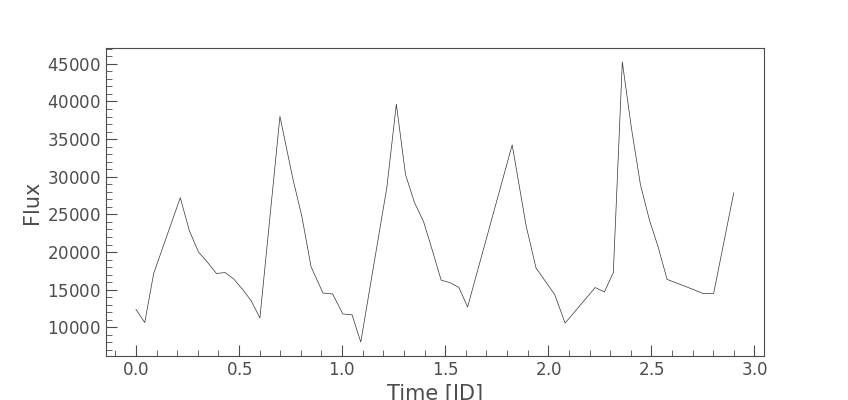

In [103]:
ngclk.plot()

## Do a light detrending of the data and normalize
Detrending means fitting and removing a low order curve from the data
Normalize means to convert the y-axis into relative flux by dividing by that low-order curve.

0.37864703713667447 2.260077082048805


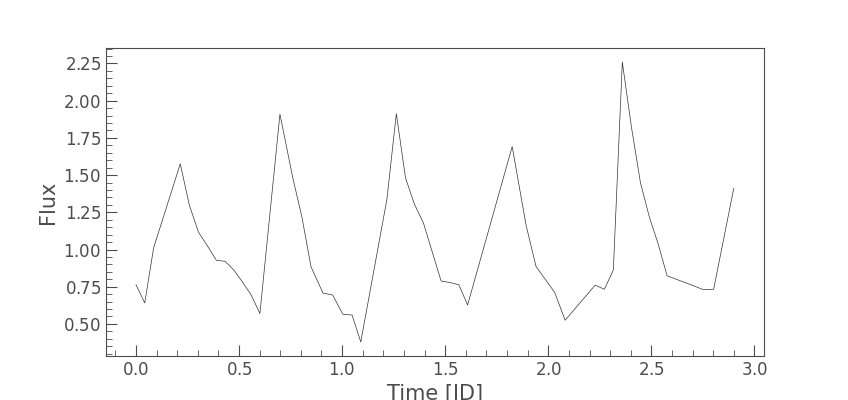

In [104]:
ngclk_clean = ngclk.flatten(window_length=35).remove_outliers().remove_nans()
ngclk_clean.plot()
print(np.min(ngclk_clean.flux), np.max(ngclk_clean.flux))

## Is there a periodic signal in the data?
Take a periodogram

In [119]:
pgm = ngclk_clean.to_periodogram(method='lombscargle', normalization='amplitude')

<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power'>

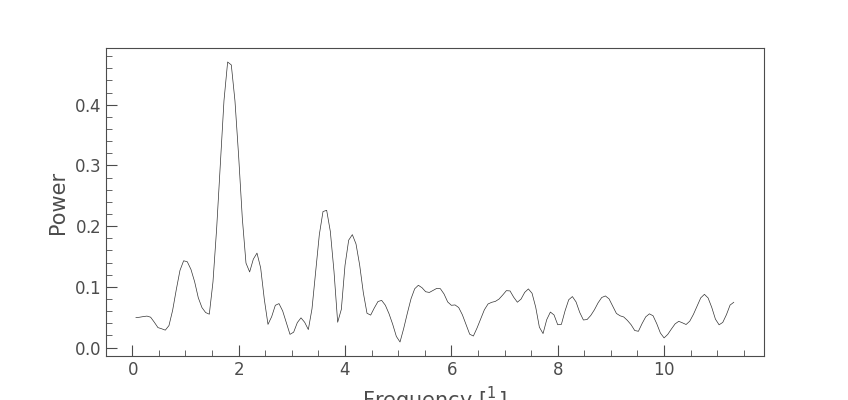

In [120]:
pgm.plot()

Notice that the above says 'power', but we actually asked it to give it to us in amplitude.
Power is usually amplitude squared.

In [111]:
pgm.period_at_max_power`

<Quantity 0.55764231 d>

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux'>

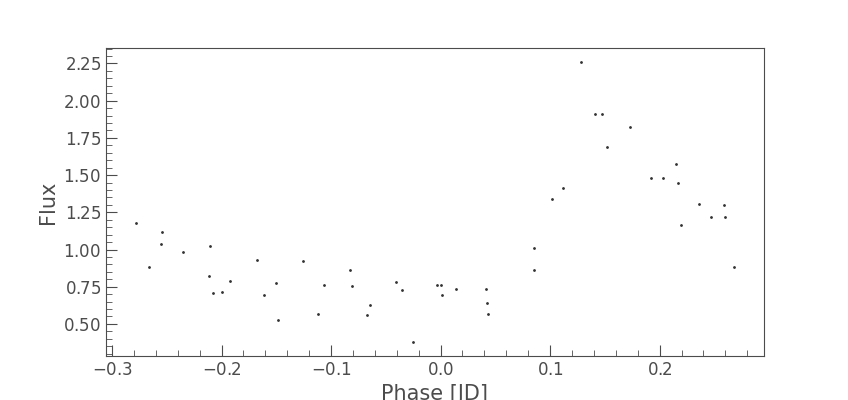

In [113]:
ngcfold = ngclk_clean.fold(pgm.period_at_max_power)
ngcfold.scatter()